<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

### Загружаем данные, выводим первые три строки

In [22]:

df = pd.read_csv('data/hh_database.csv', sep = ';')
df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


### Основная информацию о структуре данных.

In [23]:

type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

NoneType

- В таблице 12 колонок и 44744 строк.
- Все данные имеют тип object.
- В признаках 'Опыт работы', 'Последнее/нынешнее место работы' и 'Последняя/нынешняя должность' есть пропуски.

### Основная статистическая информация о столбцах.


In [24]:
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


In [25]:

uniq = df['Опыт работы'].nunique()
print(f'Количество уникальных значений в столбце «Опыт работы»: {uniq}')

Количество уникальных значений в столбце «Опыт работы»: 44413


In [26]:
# Какая из искомых должностей самая распространённая? 
df['Ищет работу на должность:'].value_counts().head(5)

Ищет работу на должность:
Системный администратор    3099
Инженер                     966
Аналитик                    809
Менеджер проектов           745
Руководитель проекта        718
Name: count, dtype: int64

# Преобразование данных

Начнем с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…

Создадим с помощью функции-преобразования "getEducation" новый признак **"Образование"**, который будет иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".


In [27]:

def getEducation(initStr):
    tmp = initStr.replace('  ', ' ')
    tmp = tmp.lower()
    tmp = tmp.split(' ')
    
    if not len(tmp):
        return np.nan

    for i, itm in enumerate(tmp):
        if itm == 'образование':
            return ' '.join(tmp[: i])
    
df['Образование'] = df['Образование и ВУЗ'].apply(getEducation)
df.drop(columns = 'Образование и ВУЗ', inplace = True)

df.head(3)
    

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное


In [28]:
# Посмотрим сколько соискателей имеет средний уровень образования (школьное образование)?
cnt = df[df['Образование'] == 'среднее'].shape[0]
print(f'{cnt} соискателей имеет средний уровень образования (школьное образование)')

559 соискателей имеет средний уровень образования (школьное образование)


Теперь преобразуем столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Выделим каждый параметр в отдельный столбец.

Создадим два новых признака **"Пол"** и **"Возраст"**.
* Признак пола: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста: целое число.



In [29]:

df['Пол'] = df['Пол, возраст'].apply(lambda x: x[0])

def getAge(initString):
    tmp = initString.split(',')
    tmp = tmp[1].strip()
    tmp = tmp.split(' ')
    return int(tmp[0])

df['Возраст'] = df['Пол, возраст'].apply(getAge)

df.drop(columns = 'Пол, возраст', inplace = True)

df.head(3)
    

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36


In [30]:
# Сколько процентов женских резюме представлено в наших данных?
res = 100 * df[df['Пол'] == 'Ж'].shape[0] / df.shape[0]
print(f'Процент женских резюме: {res:.2f}')

Процент женских резюме: 19.07


In [31]:
# Чему равен средний возраст соискателей?
mean = df['Возраст'].mean()
print(f'Средний возраст соискателей {mean:.1f}, лет')

Средний возраст соискателей 32.2, лет


Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Выделим общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"


In [32]:

def getExperience(initString):
    if type(initString) != str:
        return initString
    tmp = initString.replace('  ', ' ')
    tmp = tmp.strip()
    if tmp == 'не указано':
        return np.nan
    tmp = tmp.lower()
    tmp = tmp.split(' ')
    if not len(tmp):
        return np.nan
    
    
    result = 0 
    
    for i, item in enumerate(tmp[: 7]):
        if item.startswith('год') or item.startswith('лет'):
            try:
                result =  int(tmp[i - 1]) * 12
            except ValueError as er:
                print(er)

        if item.startswith('мес'):
            try:
                result +=  int(tmp[i - 1])
            except ValueError as er:
                print(er)
            break
            
    return result

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(getExperience)

df.drop(columns = 'Опыт работы', inplace = True)

df.head(3)
    

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0


In [33]:
# Чему равен медианный опыт работы (в месяцах)
med = df['Опыт работы (месяц)'].median()
print(f'медианный опыт работы (в месяцах): {med}')

медианный опыт работы (в месяцах): 100.0


Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**.

* Признак **"Город"** ,будет содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначим как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Нас интересует только сам факт готовности к командировке. Если инфорсация о переезде отсутствует, значит такие соискатели не готовы к командировкам.
    


In [34]:
million_cities = ['Новосибирск', 
                  'Екатеринбург', 
                  'Нижний Новгород', 
                  'Казань', 
                  'Челябинск', 
                  'Омск', 
                  'Самара', 
                  'Ростов-на-Дону', 
                  'Уфа', 
                  'Красноярск', 
                  'Пермь', 
                  'Воронеж', 
                  'Волгоград' 
                  ]

def getCity(initStr):
    tmp = initStr.strip()
    tmp = tmp.replace('  ', ' ')
    tmp = tmp.split(', ')

    global million_cities
    city = tmp[0]
    city = city.split(' ')
    city = city[0]

    if city == 'Москва' or city == 'Санкт-Петербург':
        return city
        
    if city not in million_cities:
        return 'другие'
    
    return 'город-миллионник'


def getMoving(inputString):
    tmp = inputString.strip()
    tmp = tmp.replace('  ', ' ')
    tmp = tmp.split(', ')
    
    for item in tmp[1: ]:
        if 'хочу' in item:
            return True
        if 'переезд' in item:
            return not item.strip().startswith('не')
    return False
    

    
def getTrip(inputString):
    tmp = inputString.strip()
    tmp = tmp.replace('  ', ' ')
    tmp = tmp.split(', ')
    
    for item in tmp[1: ]:
        
        if 'командировка' in item:
            return not item.strip().startswith('не')
    return False
    
    
        
        
df['Город'] = df['Город, переезд, командировки'].apply(getCity)
df['Готовность к переезду']      = df['Город, переезд, командировки'].apply(getMoving)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(getTrip)

df.drop(columns = 'Город, переезд, командировки', inplace = True)
    

In [35]:
# Сколько процентов соискателей живут в Санкт-Петербурге

spbSitizen =  100 * df[df['Город'] == 'Санкт-Петербург'].shape[0] / df.shape[0]
print(f'{spbSitizen:.0f} процентов соискателей живут в Санкт-Петербурге')

11 процентов соискателей живут в Санкт-Петербурге


In [36]:
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?
msk_1 = df['Готовность к командировкам'] == True
msk_2 = df['Готовность к переезду']      == True

readyToTrip = 100 * df[msk_1 & msk_2].shape[0] / df.shape[0]
print(f'{readyToTrip:.0f} процентов соискателей готовы одновременно и к переездам, и к командировкам')

32 процентов соискателей готовы одновременно и к переездам, и к командировкам


Рассмотрим признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.



In [37]:
# Разделим занятость по категориям
employment = [
        'полная занятость', 
        'частичная занятость', 
        'проектная работа', 
        'волонтерство', 
        'стажировка'
]

for i in employment:
    df[i] = df['Занятость'].apply(lambda x: i in x)
    

# Разделим график по категориям
schedule = [
        'полный день', 
        'сменный график', 
        'гибкий график', 
        'удалённая работа', 
        'вахтовый метод'
]

for i in schedule:
    df[i] = df['График'].apply(lambda x: i in x)
    
# Удаляем ненужные признаки, занятость и график
df.drop(columns = ['Занятость', 'График'], inplace = True)



In [38]:
# Сколько людей ищут проектную работу и волонтерство?
msk_1 = df['проектная работа'] == True
msk_2 = df['волонтерство']     == True
tmp = df[msk_1 & msk_2].shape[0]
print(f'{tmp} людей ищут проектную работу и волонтерство')


436 людей ищут проектную работу и волонтерство


In [39]:
# Сколько людей хотят работать вахтовым методом и с гибким графиком
msk_1 = df['вахтовый метод'] == True
msk_2 = df['гибкий график']     == True
tmp = df[msk_1 & msk_2].shape[0]
print(f'{tmp} людей хотят работать вахтовым методом и с гибким графиком')

2311 людей хотят работать вахтовым методом и с гибким графиком


Рассмотрим признак заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Хотелось бы видеть заработную плату в единой валюте, например, в рублях.
Сделаем выгрузку с сайта MDF.RU данных о курсах различных валют с 29.12.2017 по 05.12.2019 в виде csv файлов. 

Создадим новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".

In [40]:
# Загружаем данные с курсами валют по дням
exchangeRate = pd.read_csv('data/ExchangeRates.csv')

# Преобразуем тип данных в datetime
exchangeRate['date'] = pd.to_datetime(exchangeRate['date'], format = '%d/%m/%y')

# Удаляем неиспользуемые признаки
exchangeRate.drop(columns = ['per', 'time', 'vol'], inplace = True)
exchangeRate.head(4)

,currency,date,close,proportion
0,USD,2017-12-29,57.6291,1
1,USD,2017-12-30,57.6002,1
2,USD,2017-12-31,57.6002,1
3,USD,2018-01-01,57.6002,1


In [41]:
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst = True).dt.normalize()

# Словарь для преобразования названий валют в ISO кодировку
# Нужен чтобы соединить два фрейма

curDict = {
    'грн':    'UAH',
    'гр':    'UAH',
    'usd':    'USD',
    'us' :    'USD',
    'eur':    'EUR',
    'eu':     'EUR',
    'белруб': 'BYN',
    'белру':  'BYN',
    'kgs':    'KGS',
    'kg':    'KGS',
    'сум':    'UZS',
    'су':    'UZS',
    'azn':    'AZN',
    'az':    'AZN',
    'kzt':    'KZT',
    'kz':     'KZT',
    'руб':    'руб',
    'ру' :    'руб' 
}

# С помощью функции "getCurrency" из столбца "ЗП" получим названий валют в ISO кодировке
def getCurrency(initStr):
    tmp = initStr.replace('.', '')
    tmp = tmp.split(' ')
    tmp = tmp[1][: -1]
    tmp = tmp.lower()
    global curDict
    return curDict[tmp]
    
df['Валюта'] = df['ЗП'].apply(getCurrency)

# В столбце ЗП оставим только числа
df['ЗП'] = df['ЗП'].apply(lambda x: float(x.split(' ')[0]))
df.head(3)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Валюта
0,29000.0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,False,False,True,True,True,False,True,руб
1,40000.0,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,...,True,True,False,False,True,True,True,False,False,руб
2,20000.0,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,...,False,False,False,False,True,False,False,False,False,руб


In [42]:
# Объединяем обе таблицы
mearged = df.merge(exchangeRate, 
                   how = 'left',
                   left_on  = ['Обновление резюме', 'Валюта'],
                   right_on = ['date','currency'])
mearged.head(3)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Валюта,currency,date,close,proportion
0,29000.0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,True,руб,NaN,NaT,NaN,NaN
1,40000.0,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,...,True,True,True,False,False,руб,NaN,NaT,NaN,NaN
2,20000.0,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,руб,NaN,NaT,NaN,NaN


In [43]:
# Чтобы пересчитать ЗП в рубли заменяем NaN на 1
mearged[['proportion', 'close']] = mearged[['proportion', 'close']].fillna(1)

# Пересчитываем ЗП в рубли
mearged['ЗП'] = mearged['ЗП'] * mearged['close'] / mearged['proportion']

# Удаляем лишние признаки
mearged.drop(columns = [
    'Валюта',
    'currency',
    'date',
    'close',
    'proportion'        
], inplace = True )

mearged.head(5)

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод
0,29000.0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,False,True
1,40000.0,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,False,False
2,20000.0,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,True,False,False,False,False
3,100000.0,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,...,True,True,True,False,False,False,False,True,False,False
4,140000.0,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,...,True,False,False,False,False,True,False,False,False,False


In [44]:
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
tmp = mearged['ЗП'].median()
print(f'желаемая медианная заработная плата соискателей (в рублях): {tmp}')

желаемая медианная заработная плата соискателей (в рублях): 59019.0


# Исследование зависимостей в данных

### Распределение признака **"Возраст"**

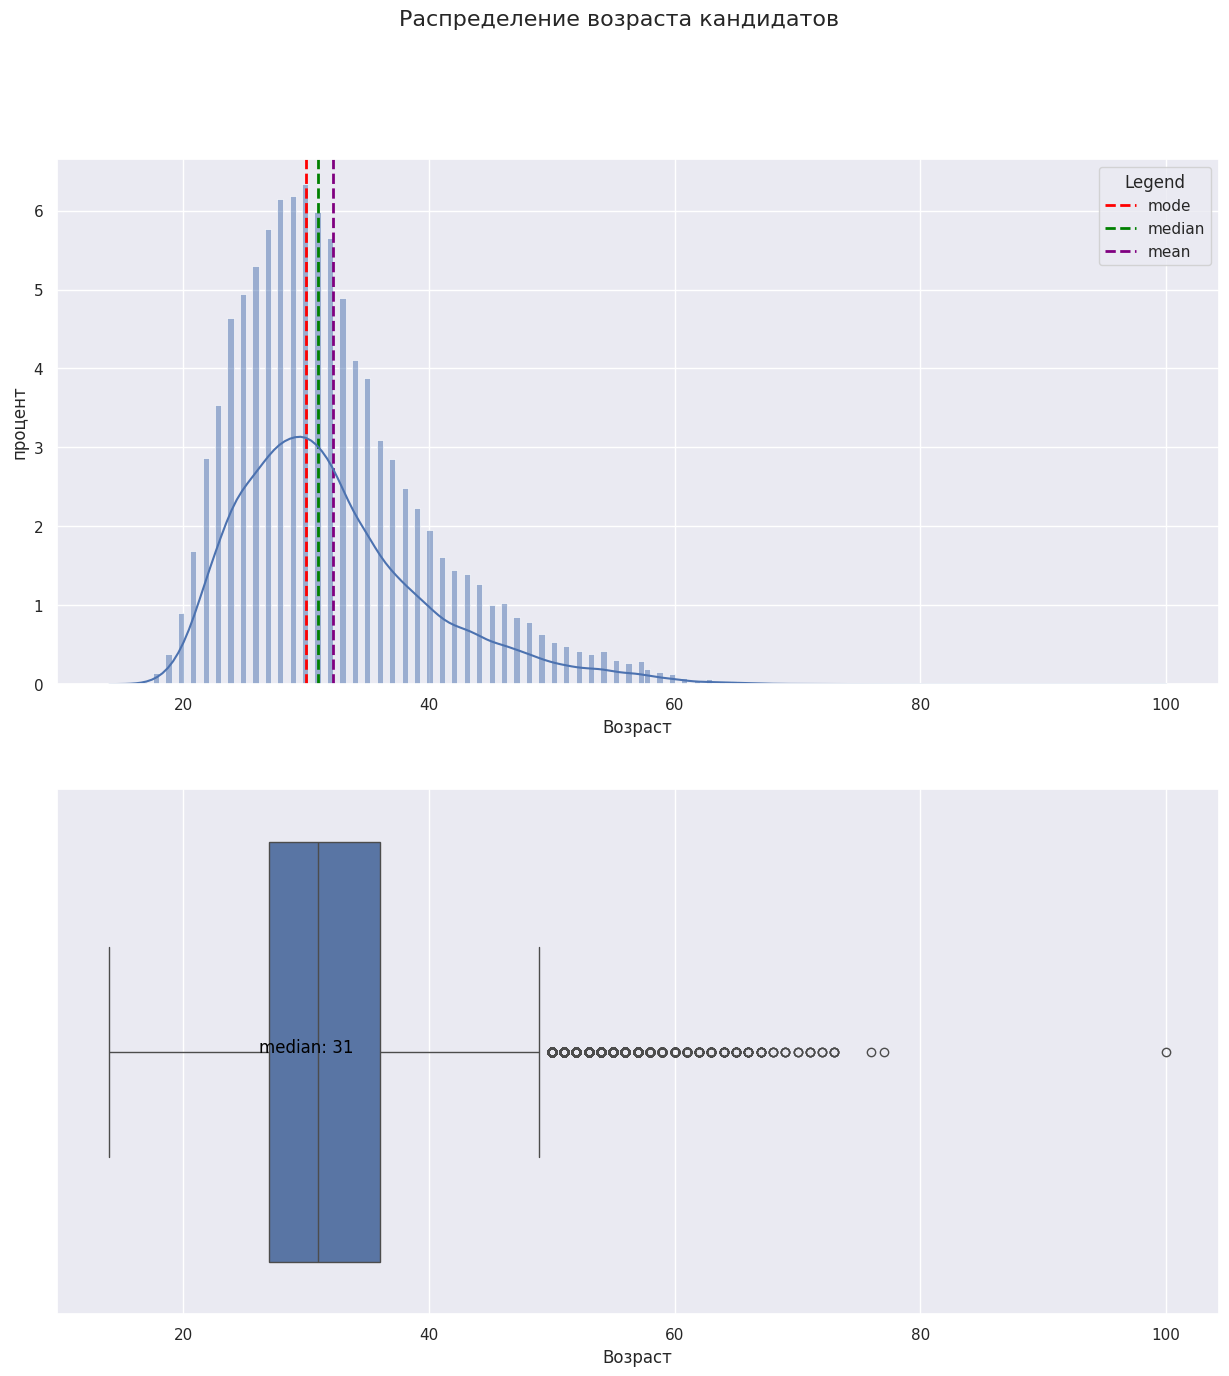

In [45]:


sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(figsize = (15, 15),
                       nrows = 2,
                       ncols = 1)

# Для наглядности добавим на гистограмму моду, медиану и среднее
mode    = mearged['Возраст'].mode()[0]
median  = mearged['Возраст'].median()
mean    = mearged['Возраст'].mean()

axes[0].axvline(mode,   color = 'red',    linestyle = "--", linewidth=2, label = 'mode')
axes[0].axvline(median, color = 'green',  linestyle = "--", linewidth=2, label = 'median')
axes[0].axvline(mean,   color = 'purple', linestyle = "--", linewidth=2, label = 'mean')
    
# Настройка легенды и подписей
axes[0].legend(title = "Legend")


fig.suptitle('Распределение возраста кандидатов', fontsize=16)



sns.histplot(data = mearged['Возраст'],
             kde = True,
             stat = 'percent',
             ax = axes[0]);
axes[0].set_ylabel('процент')

sns.boxplot(data = mearged,
            x = 'Возраст',
            ax = axes[1]);

axes[1].annotate(text = f'median: {median:.0f}',
                 xy = (30, 0),
                 ha = 'center',
                 color = 'black');


In [46]:
# Чему равно модальное значение возраста соискателей?
mod = mearged['Возраст'].mode()
print(f'модальное значение возраста соискателей: {mod}')
mearged['Возраст'].describe(include = 'all')

модальное значение возраста соискателей: 0    30
Name: Возраст, dtype: int64


count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

  ### Выводы по распределению возраста
  - Распредиление возраста мономодально, с модой 30 лет.
  - Имеет форму логнормального распределения с правой ассиметрией.
  - Минимальный возраст соискателя 14 лет
  - По формальному признаку межквартильного расстояния выбросами можно считать кандидатов с возрастом более 50 лет. Однако, руководствуясь здравым смыслом, выброс - скорее всего возраст 100 лет 

### распределение признака **"Опыт работы (месяц)"**

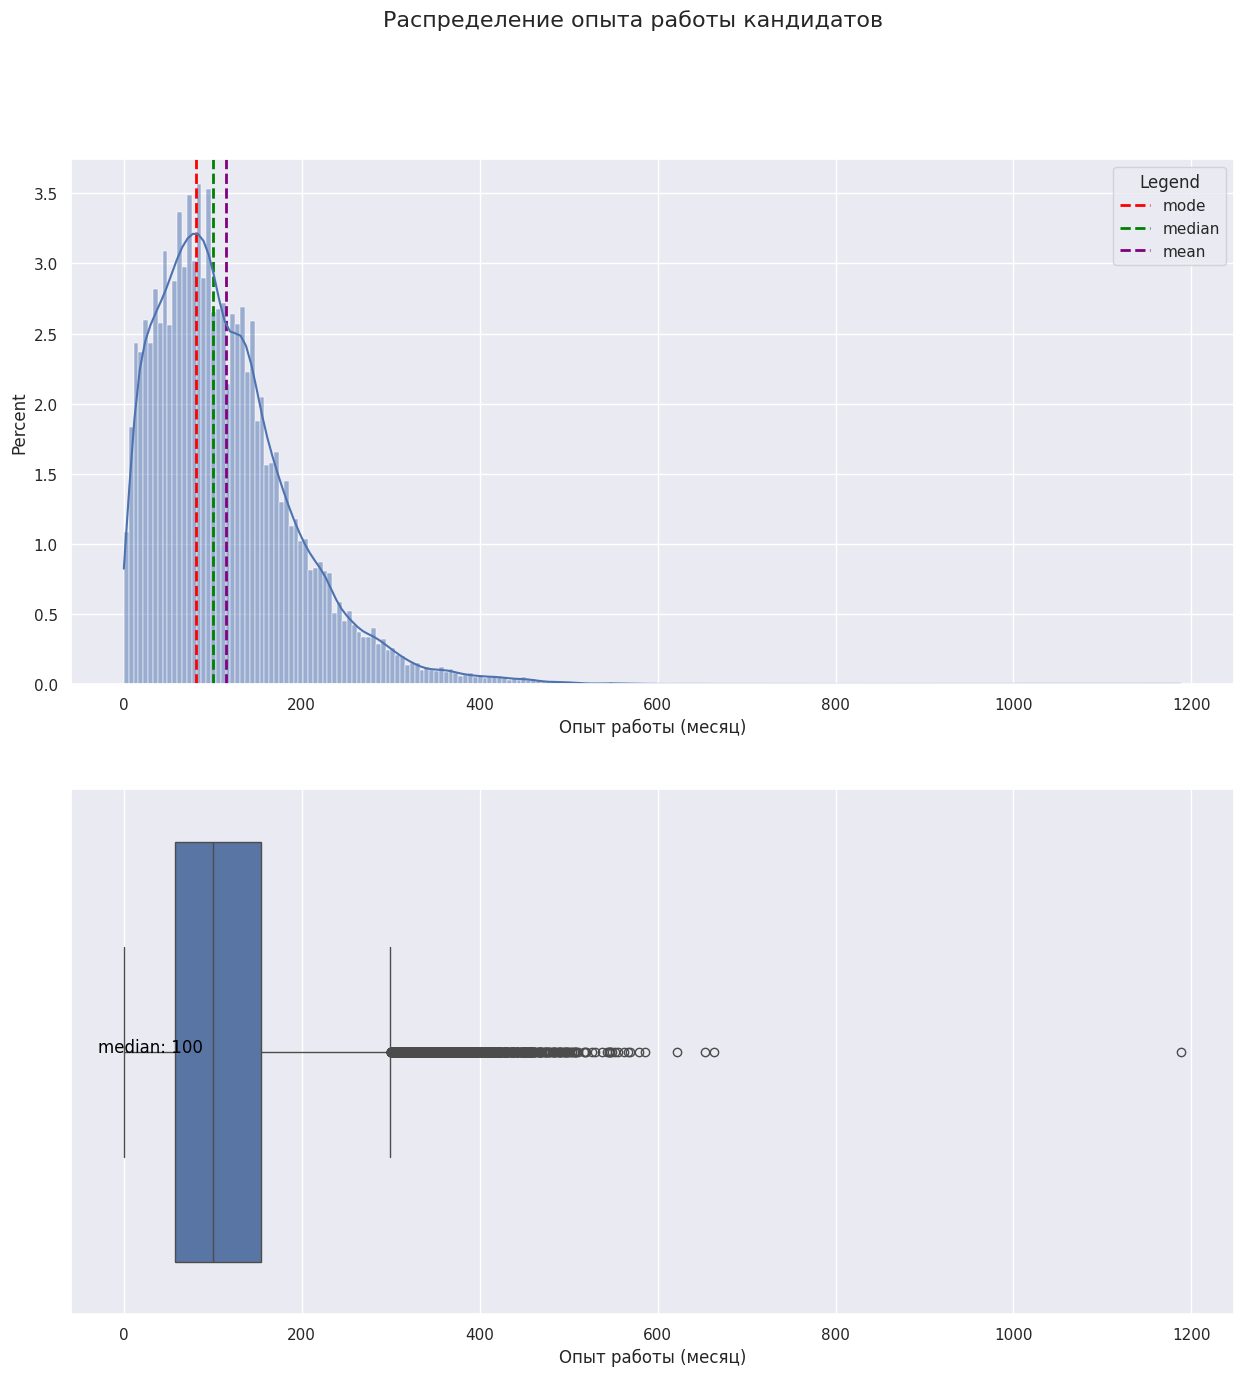

In [47]:
# ваш код здесь

fig, axes = plt.subplots(figsize = (15, 15),
                         nrows = 2,
                         ncols = 1)

fig.suptitle('Распределение опыта работы кандидатов', fontsize=16)

mode   = mearged['Опыт работы (месяц)'].mode()
median = mearged['Опыт работы (месяц)'].median()
mean   = mearged['Опыт работы (месяц)'].mean()



for i in mode:
    axes[0].axvline(i, color = 'red', linestyle="--", linewidth=2, label = 'mode')
    
axes[0].axvline(median, color = 'green',  linestyle = "--", linewidth=2, label = 'median')
axes[0].axvline(mean,   color = 'purple', linestyle = "--", linewidth=2, label = 'mean')

# Настройка легенды и подписей
axes[0].legend(title = "Legend")

sns.histplot(data = mearged['Опыт работы (месяц)'],
             kde = True,
             stat = 'percent',
             ax = axes[0]
             );

sns.boxplot(data = mearged,
            x = 'Опыт работы (месяц)',
            ax = axes[1]
            );

axes[1].annotate(text = f'median: {median:.0f}',
                 xy = (30, 0),
                 ha = 'center',
                 color = 'black');


In [48]:
mod = mearged['Опыт работы (месяц)'].mode()
print(f'модальное значение опыта работы соискателей: {mod}')
mearged['Опыт работы (месяц)'].describe(include = 'all')

модальное значение опыта работы соискателей: 0    81.0
Name: Опыт работы (месяц), dtype: float64


count    44576.000000
mean       114.413810
std         79.049803
min          0.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

 ### Выводы по распределению опыта работы
  - Распредиление опыта работы мономодально, с модой 81 месяц.
  - Имеет форму логнормального распределения с правой ассиметрией.
  - Минимальный опыт работы 0 месяцев
  - По формальному признаку межквартильного расстояния выбросами можно считать кандидатов с опытом более 300 месяцев. Однако, руководствуясь здравым смыслом, выброс - опыт работы 1188 месяцев (99 лет!!!) 

  ### Распределение признака **"ЗП (руб)"**

Text(0.5, 0, 'log10(ЗП)')

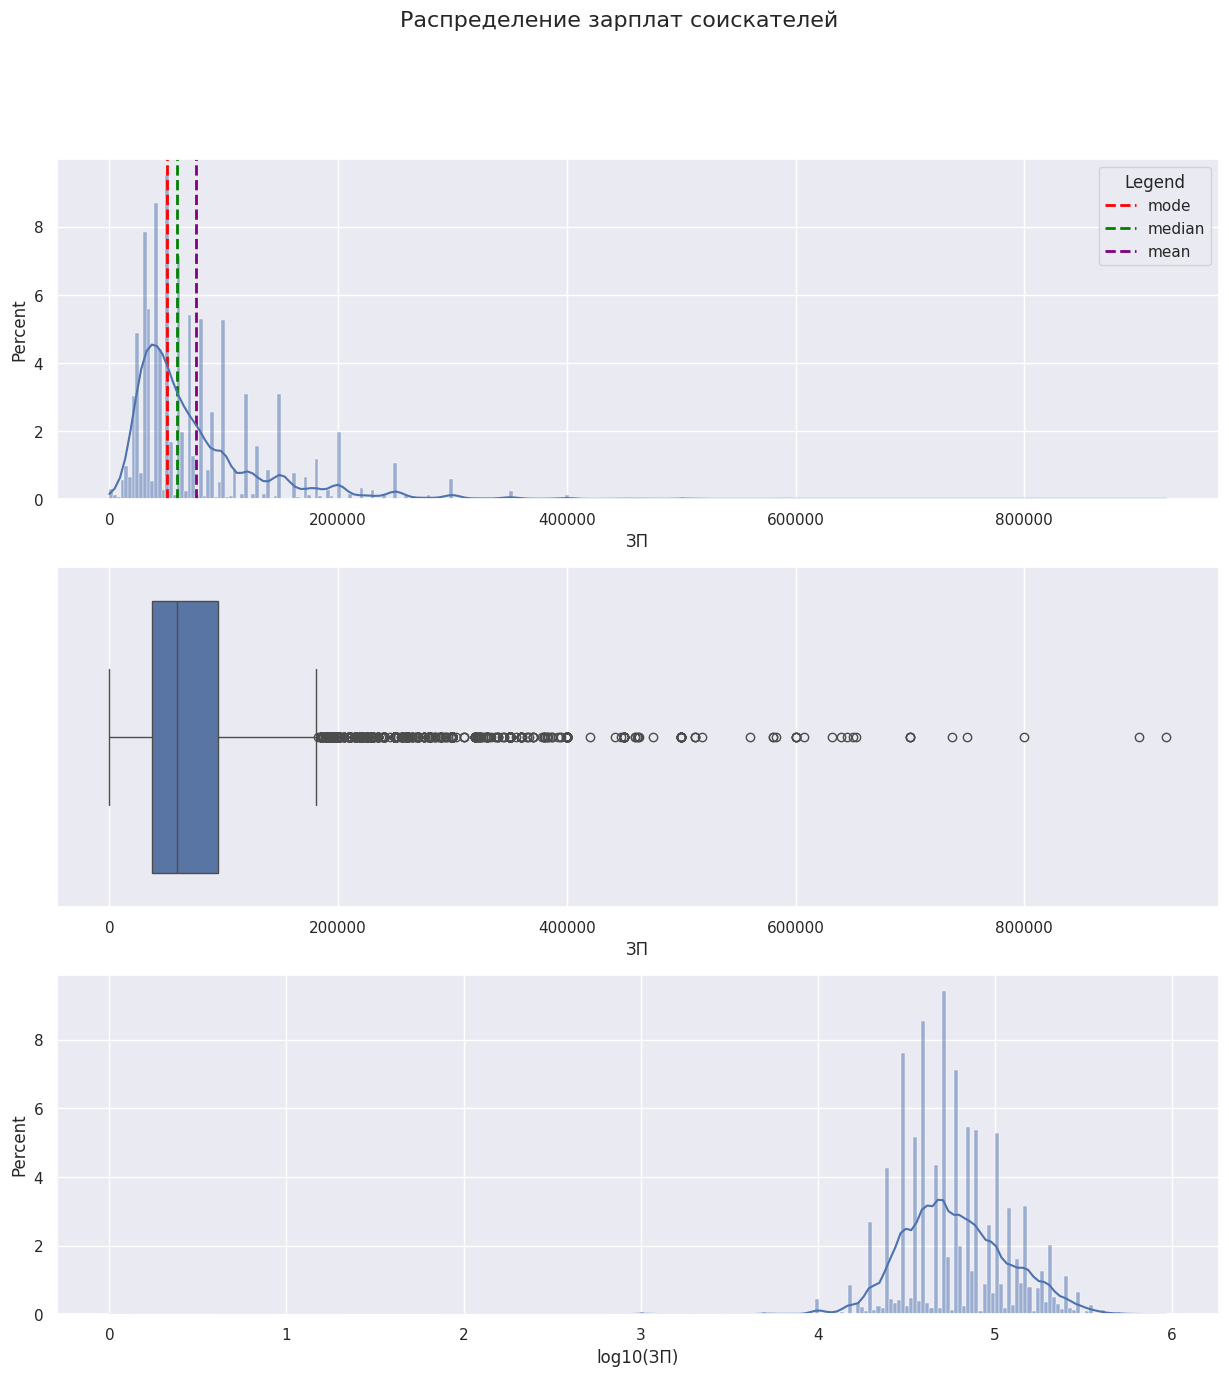

In [49]:
# ваш код здесь
fig, axes = plt.subplots(figsize = (15, 15),
                         nrows = 3,
                         ncols = 1)

fig.suptitle('Распределение зарплат соискателей', fontsize=16)

# Так как ЗП больше 1 млн руб кажется очень странной, ограничим выборку до 1 млн. руб
mask = mearged['ЗП'] < 1000000

mode   = mearged[mask]['ЗП'].mode()
median = mearged[mask]['ЗП'].median()
mean   = mearged[mask]['ЗП'].mean()

for i in mode:
    axes[0].axvline(i, color = 'red',   linestyle="--",   linewidth = 2, label = 'mode')
    
axes[0].axvline(median, color = 'green',  linestyle = "--", linewidth=2, label = 'median')
axes[0].axvline(mean,   color = 'purple', linestyle = "--", linewidth=2, label = 'mean')

# Настройка легенды и подписей
axes[0].legend(title = "Legend")

sns.histplot(data = mearged[mask]['ЗП'],
             stat = 'percent',
             kde = True,
             ax = axes[0]);

sns.boxplot(data = mearged[mask],
            x  = 'ЗП',
            ax = axes[1]);

sns.histplot(data = np.log10( mearged[mask]['ЗП']),
             stat = 'percent',
             kde  = True,
             ax = axes[2]);

axes[2].set_xlabel('log10(ЗП)')


In [50]:
mod = mearged['ЗП'].mode()
print(f'модальное значение ЗП соискателей: {mod}')
mearged['ЗП'].describe(include = 'all')

модальное значение ЗП соискателей: 0    50000.0
Name: ЗП, dtype: float64


count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП, dtype: float64

 ### Выводы по распределению зарплаты
  - Распредиление зарплаты мономодально, с модой 50000 руб.
  - Имеет форму логнормального распределения с правой ассиметрией.
  - Минимальный опыт работы 0 месяцев
  - По формальному признаку межквартильного расстояния выбросами можно считать кандидатов с зарплатой более 180000 месяцев.

Изучим зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**), в зависимости от города (**"Город"**) города, а также от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**

In [51]:

msk = mearged['ЗП'] < 1000000
# mearged['Город']
education_salary = mearged[msk].groupby('Образование', as_index = False)['ЗП'].median()
city_salary = mearged[msk].groupby('Город', as_index = False)['ЗП'].median()

mearged['Готовность к командировкам и переезду'] = mearged['Готовность к командировкам'] & mearged['Готовность к переезду']
readyToMoveAndTrip_salary = mearged[msk].groupby('Готовность к командировкам и переезду', as_index = False)['ЗП'].median()


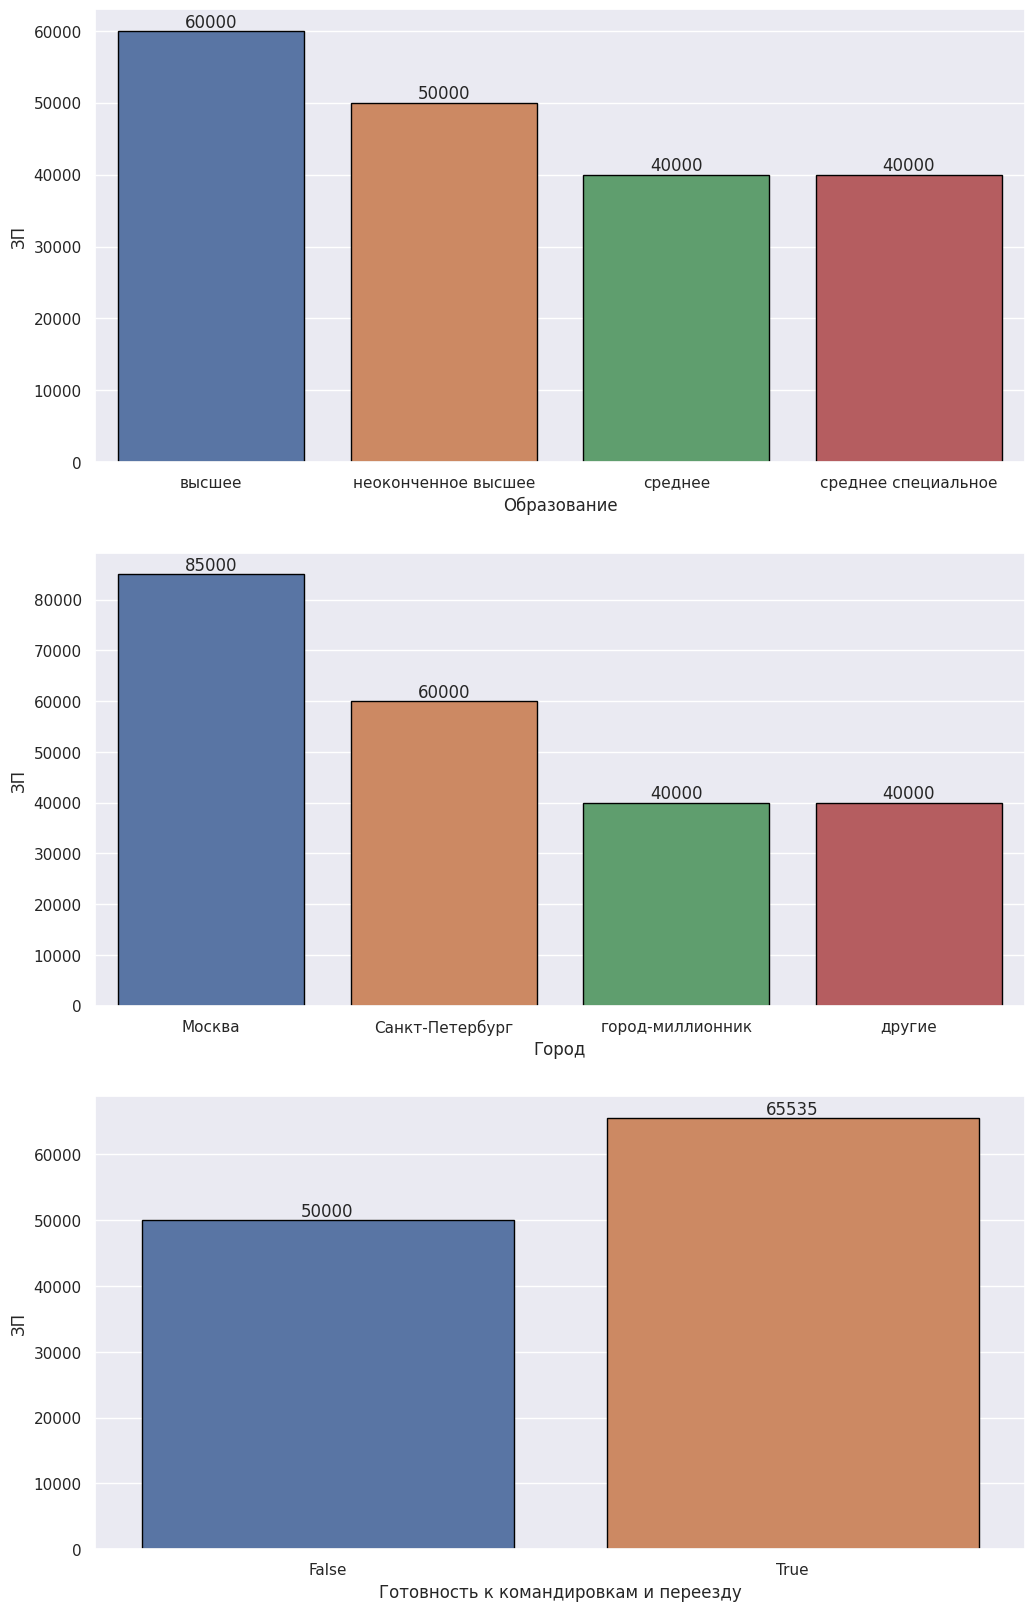

In [52]:
fig, axes = plt.subplots(figsize = (12, 20),
                         nrows = 3,
                         ncols = 1)

sns.barplot(data = education_salary ,
            hue = 'Образование',
            x = 'Образование',
            edgecolor = 'black',
            y = 'ЗП',
            ax = axes[0]
            );

sns.barplot(data = city_salary ,
            hue = 'Город' ,
            x = 'Город',
            edgecolor = 'black',
            y = 'ЗП',
            ax = axes[1]
            );

sns.barplot(data = readyToMoveAndTrip_salary,
            hue = 'Готовность к командировкам и переезду' ,
            x = 'Готовность к командировкам и переезду',
            edgecolor = 'black',
            y = 'ЗП',
            ax = axes[2],
            legend=False
            );

# Добавим отметки на диаграммах
for i in range(3):
    for j in axes[i].containers:
        axes[i].bar_label(j,)

 ### Выводы по распределению зарплат
- Наибольшая медианная заработная плата - 60000 руб у кандидатов с высшим образованием
- В Москве медианная заработная плата самая высокая - 85000 руб.
- У кандидатов, готовых к переезду и командировкам запрос по зарплате выше - 65535 руб

 ### Зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**)

In [53]:
# ваш код здесь
mearged['Образование']
pivot = mearged.pivot_table(index   = 'Возраст',
                            columns = 'Образование',
                            values  = 'ЗП',
                            aggfunc = 'mean')
pivot

Образование,высшее,неоконченное высшее,среднее,среднее специальное
Возраст,,,,
14,60000.000000,NaN,NaN,NaN
15,NaN,NaN,10000.000000,2000.000000
16,122582.490000,NaN,NaN,32000.000000
17,90075.500000,80000.000000,44000.000000,27155.980000
18,32896.511429,30204.290909,40833.333333,30213.695769
...,...,...,...,...
72,60000.000000,NaN,NaN,NaN
73,62500.000000,NaN,NaN,NaN
76,45000.000000,NaN,NaN,NaN


<Axes: xlabel='Образование', ylabel='Возраст'>

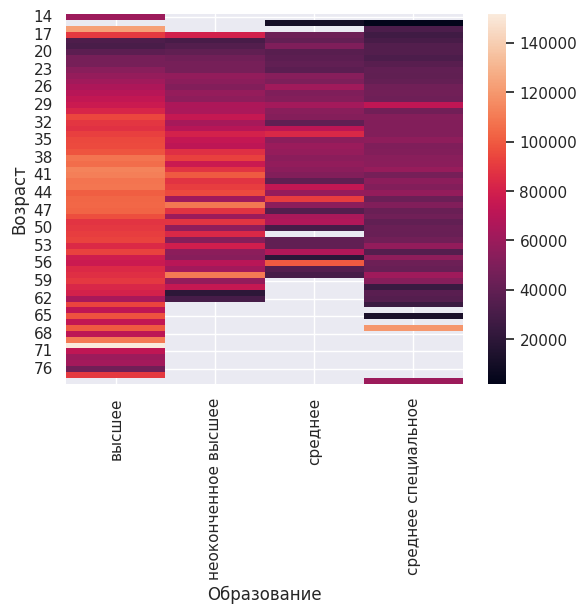

In [54]:
sns.heatmap(data = pivot,
            annot = False)

- Наибольшая средняя зарплата, около 100000 - 140000 руб у людей в возрасте от 35 до 45 лет с высшим образованием

 ###  Зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). 

/tmp/ipykernel_4739/1154312601.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(
/tmp/ipykernel_4739/1154312601.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(


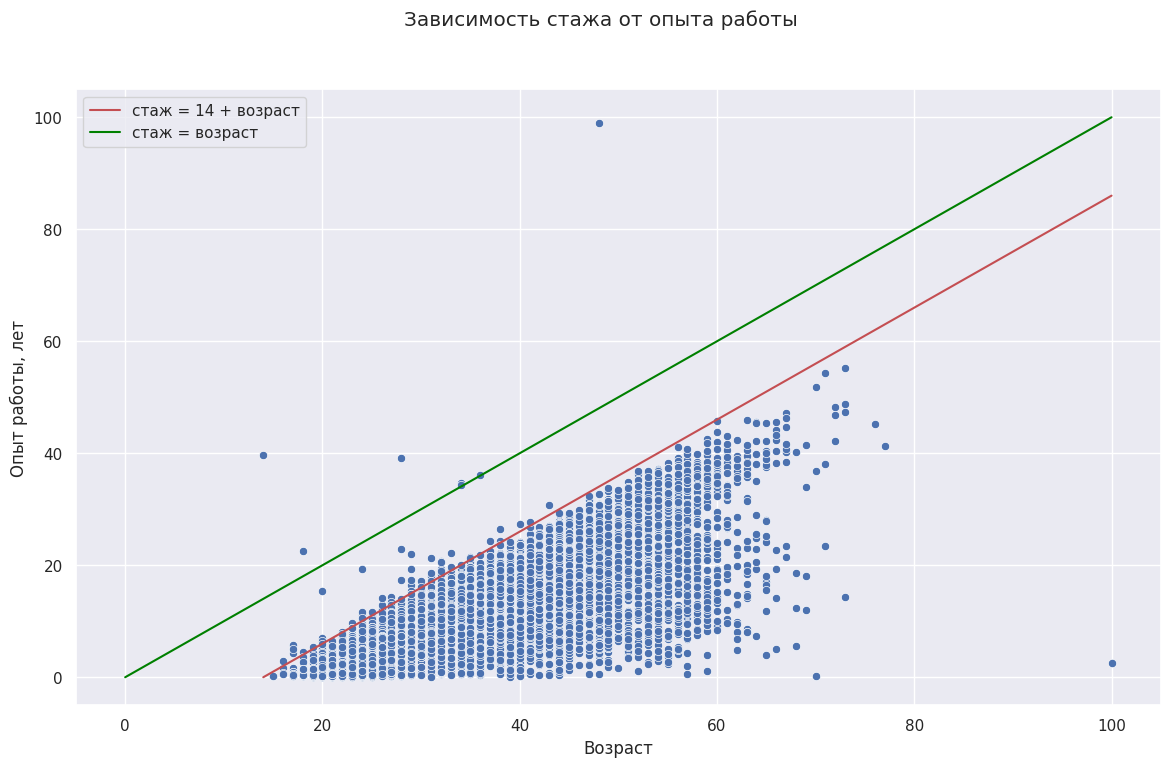

In [55]:
# ваш код здесь

fig, ax = plt.subplots(figsize = (14, 8))


fig.suptitle('Зависимость стажа от опыта работы')
ax.plot(
    [14, 100],
    [0, 86],
    'b-',
    color = 'r',
    label = 'стаж = 14 + возраст'
);

ax.set_ylabel('Опыт работы, лет')

ax.plot(
    [0, 100],
    [0, 100],
    'b-',
    color = 'green',
    label = 'стаж = возраст'
);

sns.scatterplot(
    x = mearged['Возраст'],
    y = mearged['Опыт работы (месяц)'] / 12,
    ax = ax
);

###  Выводы
- У большинства кандидатов стаж начинается с 14 лет.
- Так как в РФ не разрешен труд до 14 лет, данные по кандидатам у которых разность возраста и стажа менее 14 лет кажутся недостоверными.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [56]:
duplecated = mearged[mearged.duplicated()]
print(f'Найдено полных дубликатов: {duplecated.shape[0]}')
duplecated.head(3)

Найдено полных дубликатов: 161


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Готовность к командировкам и переезду
380,55000.0,"системный администратор, информационная безопа...","ООО ""Техкомплект""",Системный администратор,2019-04-10,Имеется собственный автомобиль,высшее,М,38,207.0,...,True,False,False,False,True,False,True,False,False,False
543,37000.0,Аналитик,Федеральная служба по регулированию алкогольно...,Главный специалист-эксрепт,2019-04-16,Не указано,высшее,М,26,40.0,...,False,False,False,False,True,False,False,False,False,False
876,35000.0,Системный администратор,ЗАО БАНК РУССКИЙ СТАНДАРТ,Специалист отдела информационных технологий,2019-04-20,Имеется собственный автомобиль,высшее,М,36,99.0,...,False,False,False,False,True,False,False,False,False,False


Выведем информацию **о числе пропусков** в столбцах. 

In [57]:
columns = mearged.columns.values
for col in columns:
    number_of_nulls = mearged[col].isnull().sum()
    if number_of_nulls:
        print(f'В колонке {col} {number_of_nulls} пропусков')

В колонке Последнее/нынешнее место работы 1 пропусков
В колонке Последняя/нынешняя должность 2 пропусков
В колонке Опыт работы (месяц) 168 пропусков


Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [58]:
msk_1 = mearged['Последнее/нынешнее место работы'].isnull() == False
msk_2 = mearged['Последняя/нынешняя должность'].isnull() == False
mearged = mearged[msk_1 & msk_2]
median = mearged['Опыт работы (месяц)'].median()
# Заполняем пропуски в опыте работы медианным значением
mearged.fillna(value = {'Опыт работы (месяц)': median}, inplace = True)


In [59]:
# Посмотрим какое теперь среднее значение опыта работы
mearged['Опыт работы (месяц)'].mean()

np.float64(114.36440033972553)

Сперва очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [60]:
msk_1 = mearged['ЗП'] <= 1000000
msk_2 = mearged['ЗП'] >= 1000

mearged = mearged[msk_1 & msk_2]


In [61]:
mearged.shape[0]

44653

Удалим резюме, в которых **опыт работы в годах превышал возраст соискателя**


In [62]:
msk = mearged['Возраст'] > mearged['Опыт работы (месяц)'] / 12
mearged = mearged[msk]

Поиск выбросы в признаке **"Возраст"**

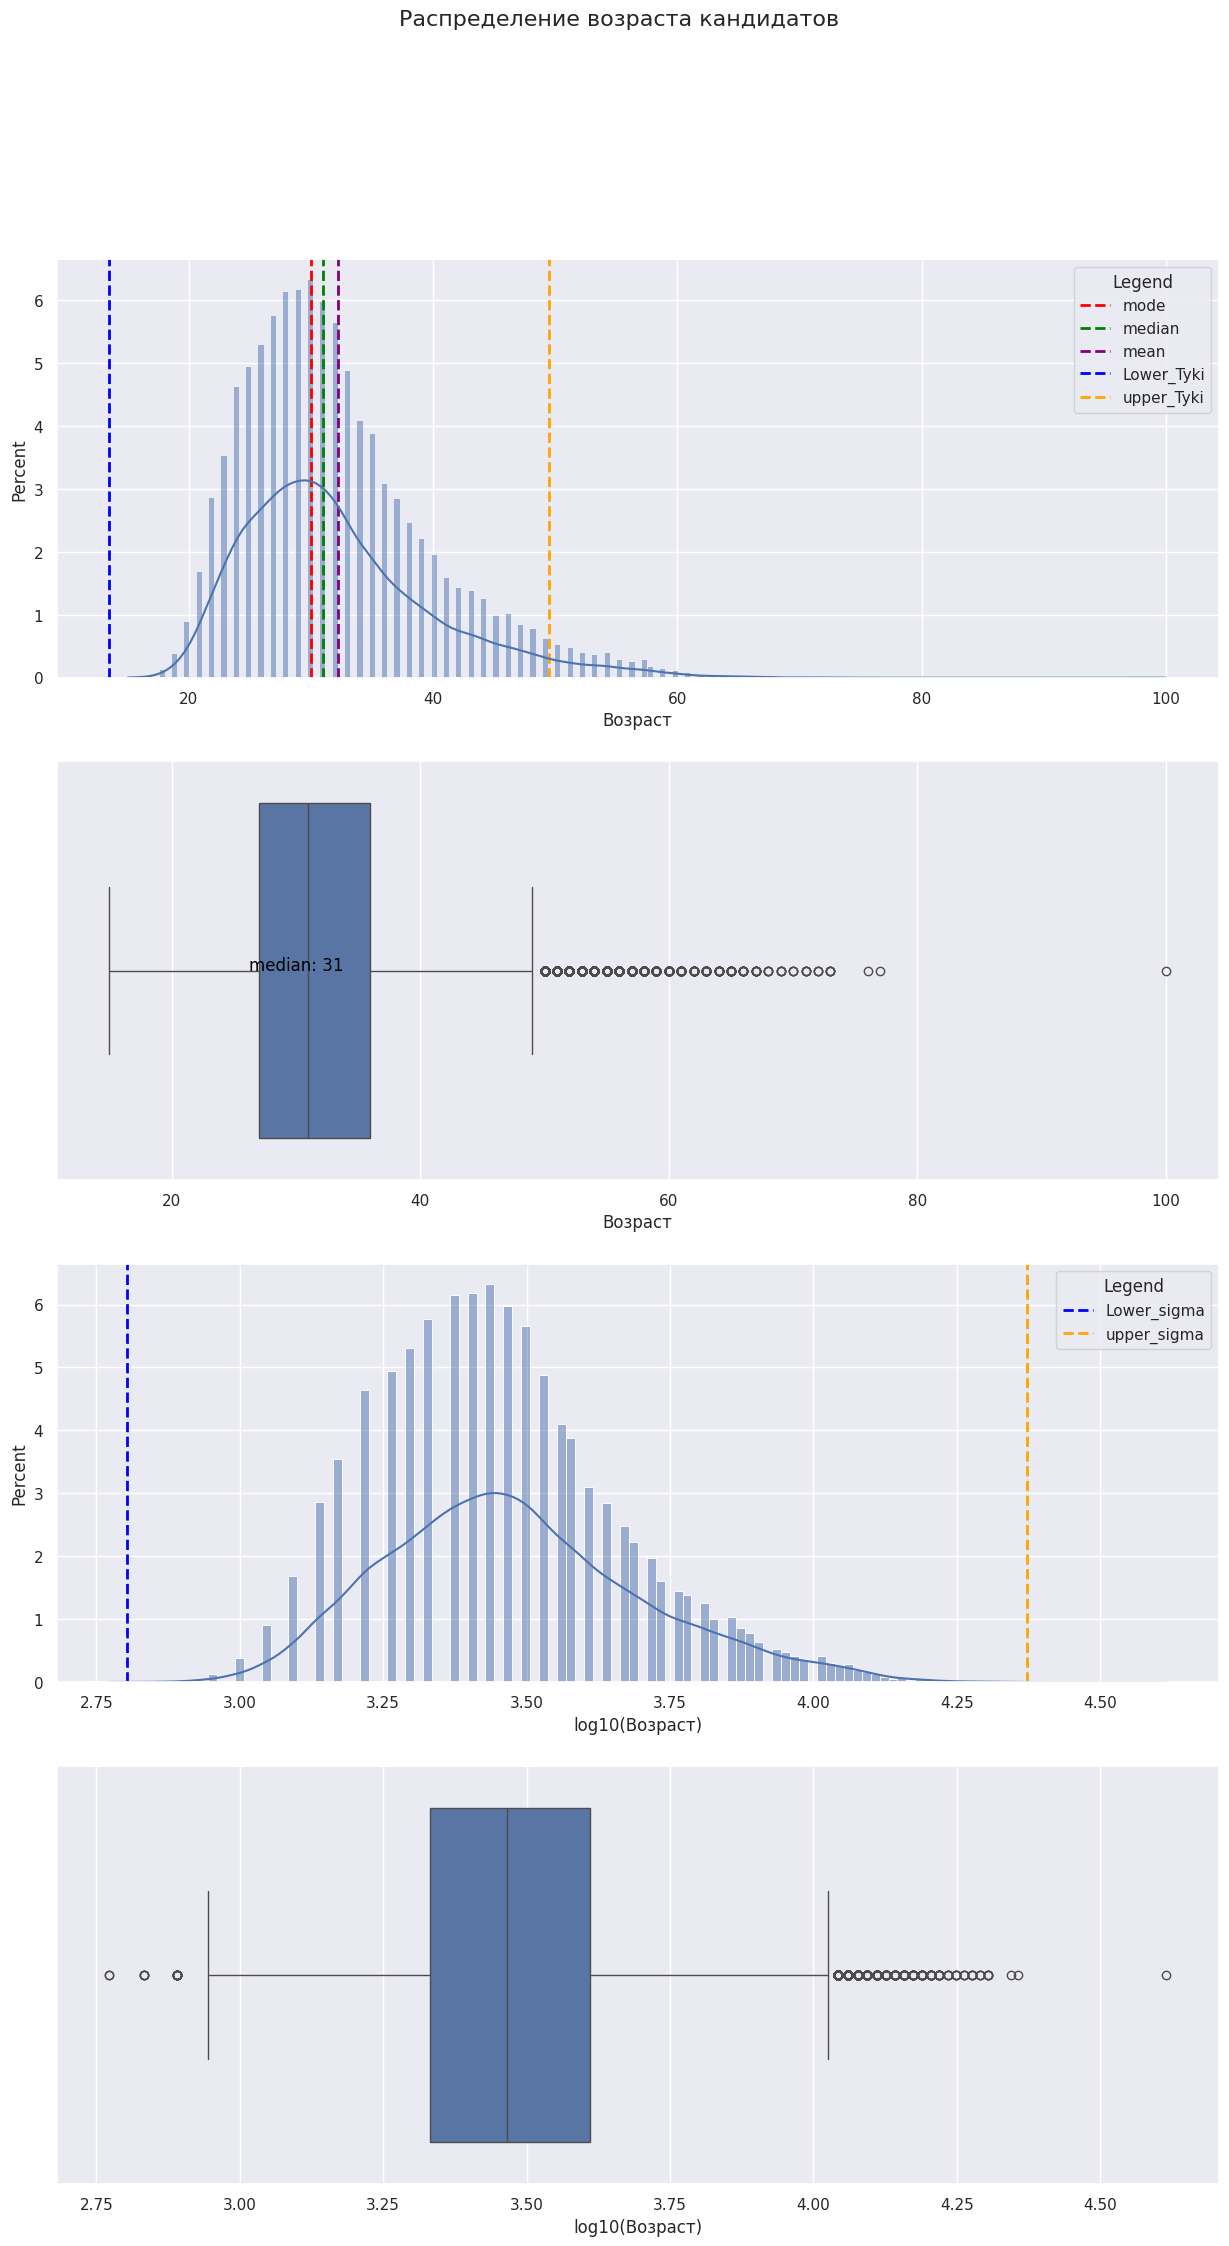

In [63]:

fig, axes = plt.subplots(figsize = (15, 25),
                       nrows = 4,
                       ncols = 1)

fig.suptitle('Распределение возраста кандидатов', fontsize=16)

mode    = mearged['Возраст'].mode()[0]
median  = mearged['Возраст'].median()
mean    = mearged['Возраст'].mean()

quantil025 = mearged['Возраст'].quantile(0.25)
quantil075 = mearged['Возраст'].quantile(0.75)

iqr   = quantil075 - quantil025
lower_Tyki = quantil025 - 1.5 *iqr
upper_Tyki = quantil075 + 1.5 * iqr

axes[0].axvline(mode,   color = 'red',    linestyle = "--", linewidth=2, label = 'mode')
axes[0].axvline(median, color = 'green',  linestyle = "--", linewidth=2, label = 'median')
axes[0].axvline(mean,   color = 'purple', linestyle = "--", linewidth=2, label = 'mean')

axes[0].axvline(lower_Tyki,   color = 'blue',   linestyle = "--", linewidth=2, label = 'Lower_Tyki')
axes[0].axvline(upper_Tyki,   color = 'orange', linestyle = "--", linewidth=2, label = 'upper_Tyki')
    
# Настройка легенды и подписей
axes[0].legend(title = "Legend")


sns.histplot(data = mearged['Возраст'],
             kde = True,
             stat = 'percent',
             ax = axes[0]);

sns.boxplot(data = mearged,
            x = 'Возраст',
            ax = axes[1]);


mearged['log10(Возраст)'] = np.log(mearged['Возраст'] + 1)
mu = mearged['log10(Возраст)'].mean()
sigma = mearged['log10(Возраст)'].std()
lower_sigma = mu - 3 * sigma
upper_sigma = mu + 4 * sigma

axes[2].axvline(lower_sigma, color = 'blue',   linestyle = "--", linewidth=2, label = 'Lower_sigma')
axes[2].axvline(upper_sigma, color = 'orange', linestyle = "--", linewidth=2, label = 'upper_sigma')
axes[2].legend(title = "Legend")

sns.histplot(data = mearged['log10(Возраст)'],
             kde = True,
             stat = 'percent',
             ax = axes[2]);

sns.boxplot(data = mearged,
            x = 'log10(Возраст)',
            ax = axes[3]);


axes[1].annotate(text = f'median: {median:.0f}',
                 xy = (30, 0),
                 ha = 'center',
                 color = 'black');


In [64]:
msk_1 = mearged['log10(Возраст)'] > upper_sigma
msk_2 = mearged['log10(Возраст)'] < lower_sigma

mearged[msk_1 | msk_2]

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Готовность к командировкам и переезду,log10(Возраст)
31137,10000.0,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,...,False,False,False,False,True,True,False,False,False,2.772589
32950,2000.0,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,...,False,False,False,True,False,False,False,False,False,2.772589
33654,60000.0,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,...,True,False,True,True,False,True,False,False,False,4.615121


In [65]:
# За какой период собраны резюме?
mearged['Обновление резюме'].describe()

count                            44646
mean     2019-04-14 00:14:17.304125952
min                2018-04-10 00:00:00
25%                2019-04-15 00:00:00
50%                2019-04-22 00:00:00
75%                2019-04-26 00:00:00
max                2019-05-15 00:00:00
Name: Обновление резюме, dtype: object